In [5]:
from model import ParticleClassifier
import numpy as np
import matplotlib.pyplot as plt

In [6]:
classifier = ParticleClassifier()\
                .load_data('data/toy_data.csv')\
                .train_test_split()\
                .pre_proc_images(train=True, test=True)\
                .one_hot_encode_labels(train=True, test=True)\
                .train_model()\
                .evaluate_model()\

Data loaded into self.images, self.labels
Split into self.images_train, self.images_test, self.labels_train, self.labels_test
Train and test labels encoded into self.y_train and self.y_test
Train on 1920 samples, validate on 480 samples
Epoch 1/10
1920/1920 [==============================] - 7s 4ms/sample - loss: 0.6903 - acc: 0.6573 - val_loss: 0.3183 - val_acc: 0.8500
Epoch 2/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.2945 - acc: 0.8906 - val_loss: 0.3173 - val_acc: 0.8667
Epoch 3/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.2657 - acc: 0.8922 - val_loss: 0.2341 - val_acc: 0.9208
Epoch 4/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.2001 - acc: 0.9240 - val_loss: 0.1809 - val_acc: 0.9333
Epoch 5/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.1302 - acc: 0.9557 - val_loss: 0.1657 - val_acc: 0.9438
Epoch 6/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.110

In [3]:
# Hot pixel attack
classifier.hot_pixel_attack()\
          .pre_proc_images(attacked=True)\
          .one_hot_encode_labels(attacked=True)\
          .evaluate_attack()

Train and test labels encoded into self.y_train and self.y_test
Labels: [183 202 215] 
 Original Predictions: [196 204 200] 
 Attacked Predictions: [  0 600]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       196
           1       0.34      1.00      0.51       204
           2       0.00      0.00      0.00       200

   micro avg       0.34      0.34      0.34       600
   macro avg       0.11      0.33      0.17       600
weighted avg       0.12      0.34      0.17       600



/Users/shawn/miniconda3/envs/test/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
value =  np.mean([classifier.images.max(), classifier.images.mean()])
classifier = classifier.apply_attack(classifier.add_hot_area, size=(2,2), value=value)\
                       .pre_proc_images(attacked=True, filters=False)\
                       .one_hot_encode_labels(attacked=True)\
                       .evaluate_attack()

Train and test labels encoded into self.y_train and self.y_test
Labels: [174 214 212] 
 Original Predictions: [171 205 224] 
 Attacked Predictions: [  0 209 391]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       171
           1       0.98      1.00      0.99       205
           2       0.56      0.98      0.71       224

   micro avg       0.70      0.70      0.70       600
   macro avg       0.51      0.66      0.57       600
weighted avg       0.54      0.70      0.60       600



In [ ]:
classifier.print_image(18, classifier.x_attacked)

In [ ]:
classifier.print_image(18, classifier.x_test)

In [ ]:
classifier.model.predict(np.reshape(classifier.x_attacked[18], (1,50,50,1)))

In [ ]:
n = 1
electrons = classifier.images[classifier.labels == 1]
classifier.print_image(n, electrons, save='img/electron01.png')

In [ ]:
value =  np.mean([classifier.images.max(), classifier.images.mean()])
electron_attacked = electrons[n, :, :, 0].copy()
electron_attacked[11:13, 2:6] = value
electron_attacked[11:13, 9:16] = value
plt.imshow(electron_attacked)
plt.imsave('img/electron01_neutron.png', electron_attacked)

In [ ]:
electron_attacked = np.reshape(electron_attacked, (1, 50, 50, 1))
x = classifier.pre_proc(electron_attacked)
np.argmax(classifier.model.predict(x))

In [8]:
def gaussian_kernel(a, b, s = 10, A = 0.9):
  '''
  :param (a,b), the position of the mean of the gaussian, at (x, y)
  :param s, standard deviation
  :param A, the multiplication factor
  
  These parameters can be varied to study their effects on the model prediction ---> to make plots etc
  '''
  x, y = np.meshgrid(np.linspace(0,50), np.linspace(0,50))
  e = (2*abs(x-a)**2 + 3*abs(y-b)**2)/(2*s**2)
  g = np.exp(-e)
  return -A*g + 1

def space_attack2(images):         # for the model 
    images_edited = []
    for i in images:
        (b, a) = np.unravel_index(np.argmax(i[:,:,0]), (50, 50))
        z = gaussian_kernel(a,b)
        g_pic = np.multiply(i[:,:,0], z)
        images_edited.append(g_pic)
    return np.array(images_edited).reshape((-1, 50, 50, 1))

classifier = classifier.apply_attack(space_attack2)\
                       .pre_proc_images(attacked=True, filters=False)\
                       .one_hot_encode_labels(attacked=True)\
                       .evaluate_attack()

Train and test labels encoded into self.y_train and self.y_test
Labels: [174 214 212] 
 Original Predictions: [171 205 224] 
 Attacked Predictions: [117   0 483]
              precision    recall  f1-score   support

           0       0.32      0.22      0.26       171
           1       0.00      0.00      0.00       205
           2       0.37      0.80      0.51       224

   micro avg       0.36      0.36      0.36       600
   macro avg       0.23      0.34      0.25       600
weighted avg       0.23      0.36      0.26       600



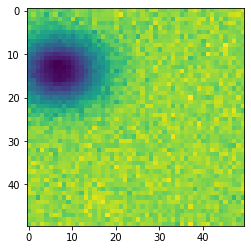

In [9]:
classifier.print_image(2, classifier.images_attacked)

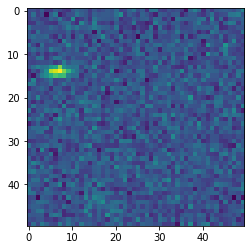

In [10]:
classifier.print_image(2, classifier.images_test)